# **Setup Mario**

In [42]:
!pip install nes-py

In [ ]:
!pip install gym

In [43]:
# !pip install gym_super_mario_bros==7.3.8 nes_py
!pip install gym-super-mario-bros

In [44]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [45]:
env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode="human")
env = JoypadSpace(env, SIMPLE_MOVEMENT)

C:\Users\Nima\anaconda3\envs\reinforcement_learning\lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [46]:
env.observation_space.shape

(240, 256, 3)

In [47]:
env.action_space

Discrete(7)

In [48]:
SIMPLE_MOVEMENT[env.action_space.sample()]

['right', 'A', 'B']

In [49]:
#done = True
#env.reset()
#for step in range(5000):
#    action = env.action_space.sample()
#    obs, reward, terminated, truncated, info = env.step(action)
#    done = terminated or truncated

#    if done:
#       env.reset()

#env.close()

In [50]:
done = True
# loop through each fram in the game
for step in range(5000):
    if done:
        # start the game
        env.reset()
    # do random actions
    state, reward, done, truncated, info = env.step(env.action_space.sample())
    # state, reward, done, info
    # show the game on the screen
    env.render()
# close the game    
env.close()

C:\Users\Nima\anaconda3\envs\reinforcement_learning\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
C:\Users\Nima\anaconda3\envs\reinforcement_learning\lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


# **Preprocess Environment**

In [51]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [52]:
!pip install stable-baselines3[extra]

In [53]:
# import Frame Stacker Wrapper and GaryScaling Wrapper
from gym.wrappers import GrayScaleObservation
# import vectorization wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplot to show the impact of frame stacking
from matplotlib import pyplot as plt

In [60]:
# Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# Wrap inside the Dummy Environmnet
env = DummyVecEnv([lambda: env])
# Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [81]:
state = env.reset()

TypeError: JoypadSpace.reset() got an unexpected keyword argument 'seed'

In [74]:
state.shape

(240, 256, 3)

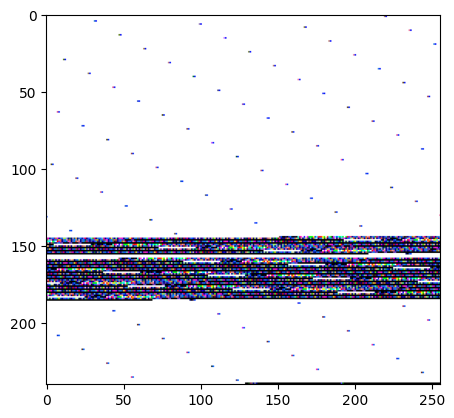

In [75]:
# Use Matplotlib to show the game frame
plt.imshow(state)

## **Train the RL Model**

## **Test it Out**